

```

    Generate artificial classification data.


```



In [72]:
number_of_samples_per_class = 15
number_of_relevant_features = 30  # TODO assert complete number of features?

number_of_pseudo_class_features = 10
number_of_random_features = 100

In [73]:
import artificial_data_generator_tools

In [74]:
number_of_features_correlated_cluster1 = 5
correlated_cluster_1 = artificial_data_generator_tools.generate_correlated_cluster(
    number_of_features=number_of_features_correlated_cluster1,
    number_of_samples=number_of_samples_per_class,
    upper_bound=1,
    lower_bound=0.6,
)

generation of correlation matrix ...
generation of covariant matrix ...


min absolute correlation: 0.48928571428571427


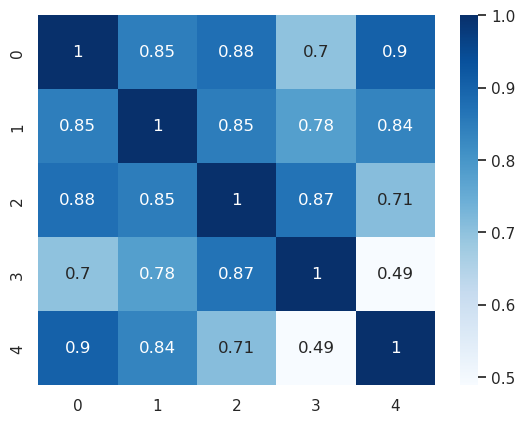

In [75]:
artificial_data_generator_tools.plot_correlated_cluster(correlated_cluster_1)

In [76]:
number_of_features_correlated_cluster2 = 10
correlated_cluster_2 = artificial_data_generator_tools.generate_correlated_cluster(
    number_of_features=number_of_features_correlated_cluster2,
    number_of_samples=number_of_samples_per_class,
    upper_bound=1,
    lower_bound=0.9,
)

generation of correlation matrix ...
generation of covariant matrix ...


/home/sigrun/miniconda3/envs/cv_pruner_dev2/lib/python3.11/site-packages/statsmodels/stats/correlation_tools.py:90: IterationLimitWarning: 
Maximum iteration reached.

  warnings.warn(iteration_limit_doc, IterationLimitWarning)


min absolute correlation: 0.8892857142857142


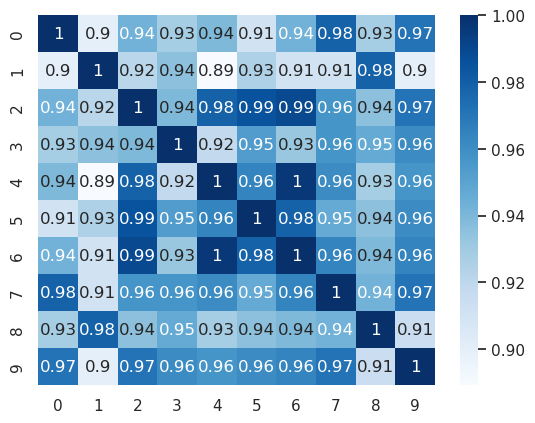

In [77]:
artificial_data_generator_tools.plot_correlated_cluster(correlated_cluster_2)

Generate complete class 1

In [78]:
class_components_list = [
    correlated_cluster_1,
    correlated_cluster_2,
]
number_of_unclustered_relevant_features = number_of_relevant_features - (
    number_of_features_correlated_cluster1 + number_of_features_correlated_cluster2
)
if number_of_unclustered_relevant_features > 0:
    unclustered_relevant_features = (
        artificial_data_generator_tools.generate_normal_distributed_informative_features_for_one_class(
            number_of_samples=number_of_samples_per_class,
            number_of_normal_distributed_relevant_features=number_of_unclustered_relevant_features,
            scale=1,
        )
    )
    class_components_list.append(unclustered_relevant_features)

In [79]:
class1_np = artificial_data_generator_tools.build_class(
    class_features_list=class_components_list,
)

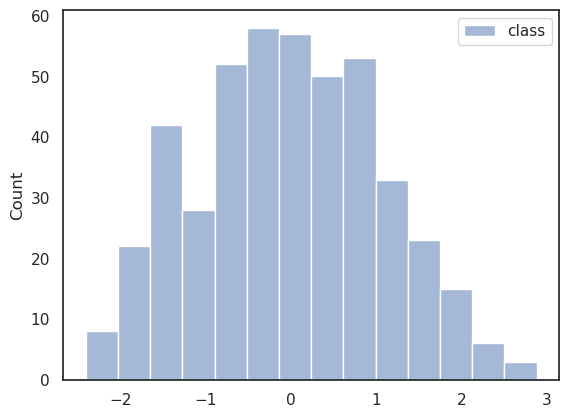

In [80]:
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(class1_np)

In [81]:
log_normal_distributed_class1_np = (
    artificial_data_generator_tools.transform_normal_distributed_class_features_to_lognormal_distribution(
        class_features_np=class1_np
    )
)
assert log_normal_distributed_class1_np.shape[1] == number_of_relevant_features

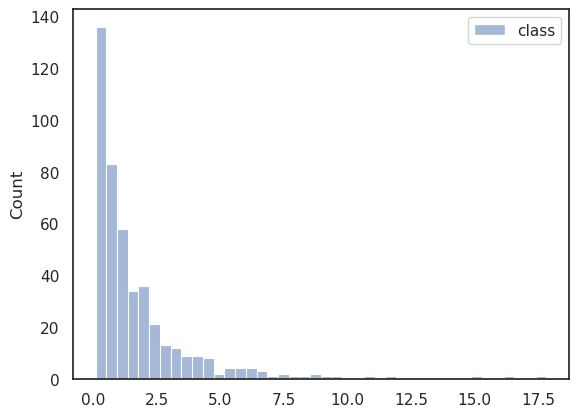

In [82]:
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(
    log_normal_distributed_class1_np,
)

Generate class 2

In [83]:
class2_np = artificial_data_generator_tools.generate_normal_distributed_informative_features_for_one_class(
    number_of_samples=number_of_samples_per_class,
    number_of_normal_distributed_relevant_features=number_of_relevant_features,
    scale=1,
)
class2_np = artificial_data_generator_tools.build_class(class_features_list=[class2_np])

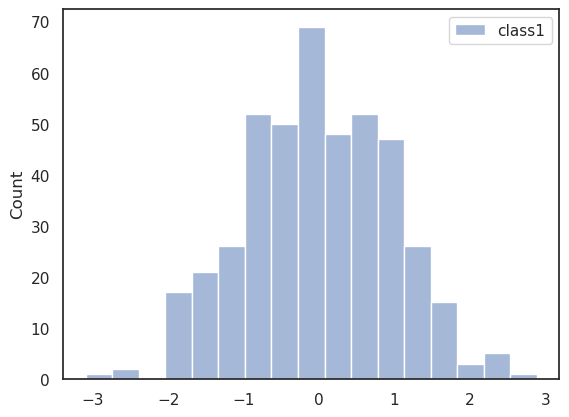

In [84]:
label_class_2 = 1
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(class2_np, label_class_2)

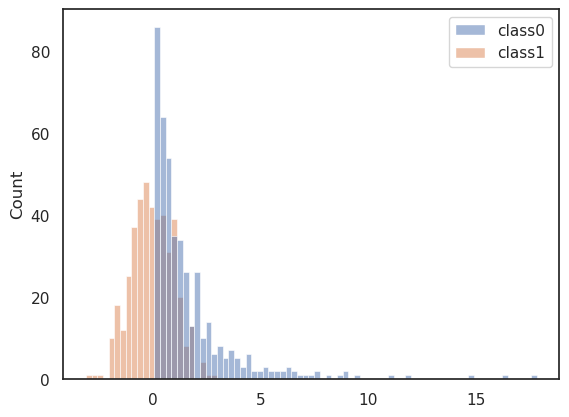

In [85]:
artificial_data_generator_tools.plot_distributions_of_all_classes([log_normal_distributed_class1_np, class2_np])

In [86]:
shifted_class1_np = artificial_data_generator_tools.shift_class_to_enlarge_effectsize(
    log_normal_distributed_class1_np, effect_size=2
)

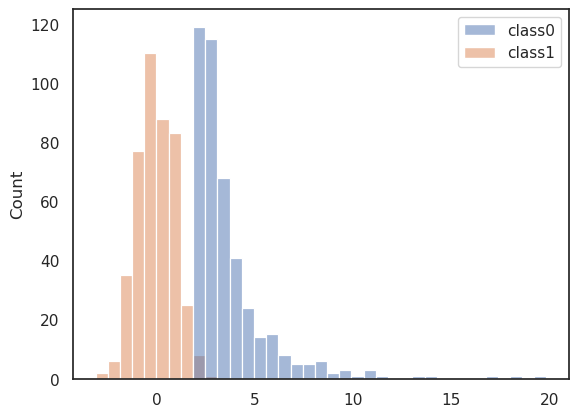

In [87]:
artificial_data_generator_tools.plot_distributions_of_all_classes([shifted_class1_np, class2_np])

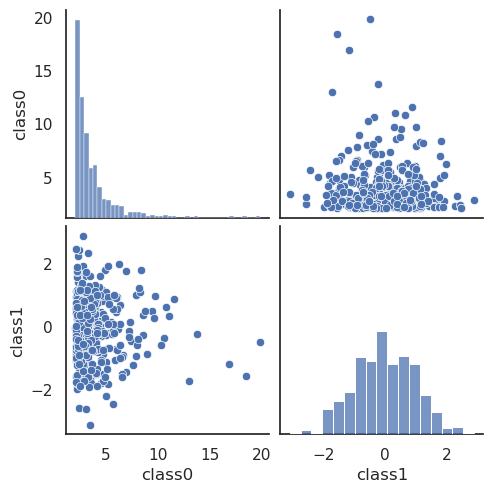

In [88]:
artificial_data_generator_tools.plot_correlation_between_classes([shifted_class1_np, class2_np])

In [89]:
artificial_data_df = artificial_data_generator_tools.generate_artificial_classification_data(
    generated_classes_list=[shifted_class1_np, class2_np],
    number_of_samples_per_class=number_of_samples_per_class,
    number_of_random_features=number_of_random_features,
    number_of_pseudo_class_features=number_of_pseudo_class_features,
    number_of_pseudo_classes=2,
)
print(artificial_data_df.shape)
print(artificial_data_df.head())

(30, 141)
   label      bm_0      bm_1      bm_2      bm_3      bm_4      bm_5  \
0    0.0  2.466407  2.478347  2.604674  2.444773  2.467816  4.923580   
1    0.0  2.237239  2.090067  2.203432  2.160755  2.114193  2.773763   
2    0.0  2.424318  2.602617  2.485850  2.479585  2.728265  2.960506   
3    0.0  2.408456  2.756014  2.349678  2.745458  2.428123  2.628251   
4    0.0  6.181572  3.907103  4.243495  3.542727  4.349894  2.184948   

       bm_6      bm_7      bm_8  ...     rf_90     rf_91     rf_92     rf_93  \
0  6.627392  4.064567  5.317033  ...  0.366063  0.103820  0.636982  0.867757   
1  2.427299  2.619833  2.724260  ...  0.042080  0.739101  0.226831  0.264083   
2  3.520855  4.035208  3.534813  ...  0.556819  0.258526  0.560803  0.368929   
3  2.432929  2.790417  2.797081  ...  0.783696  0.642601  0.567580  0.976347   
4  2.303102  2.315446  2.228789  ...  0.915065  0.664221  0.665344  0.419726   

      rf_94     rf_95     rf_96     rf_97     rf_98     rf_99  
0  0.198900 